# IMPORTING USEFUL LIBRARIES
imported libraries with alies name

In [1]:
import re 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import ydata_profiling 
from ydata_profiling import ProfileReport
import pygwalker as pg


In [2]:
#Importing the url of the source websites from which we extract the data
Url = 'https://www.shiksha.com/engineering/colleges/b-tech-colleges-india?rf=searchWidget&landing=ctp'

In [3]:
#by requests module , asked for permission to scrap the data using requests.get
Scrap_Page = requests.get(Url,headers = {'User-Agent':'Mozilla/5.0'})

In [4]:
#after requests, checked the status code of request. if it is yes , then it shows 200 . and if it is not then it will show 403
Scrap_Page.status_code

200

In [5]:
#As we know that we need lists to create a dataframe, so first we create an empty lists
College_Name = [] #empty list of college names
Ratings = [] #empty list of ratings
Courses_offered = [] #empty  list of courses offered
Annual_Package = [] # empty list of annual package
Fee_Range = [] #empty list of fee range
Location = [] #empty list of location of college
College_Type = [] #empty list of type of college
Entrance_Exams = [] #empty list of entrance exam for entry in college

#extracted the required tags and classs of the data and created soup for the required data and putted into for loop 

#As we need multiple pages to scrap  through a single website, so we putted the Url into the for loop in range of required pages

for i in range(1 ,25): # as we need 25 pages to scrap
    Url = f'https://www.shiksha.com/engineering/colleges/b-tech-colleges-india-{i}?rf=searchWidget&landing=ctp'
    Scrap_Page = requests.get(Url,headers = {'User-Agent':'Mozilla/5.0'})
    Soup = BeautifulSoup(Scrap_Page.text, 'html.parser')
    Name_Soup  = Soup.find_all('div' , attrs = {'class':'c8ff'})
    Course_Soup  = Soup.find_all('a' , attrs = {'class':'_9865 ripple dark'})
    Multiple_Soup  = Soup.find_all('div' , attrs = {'class':'cd4f _5c64 contentColumn_2'})
    City_Soup = Soup.find_all('span' , attrs = {'class':'_5588'})
    Type_Soup = Soup.find_all('div' , attrs = {'class':'edfa'})
    #After data scrapping , we need to add the data in a list so we are appending the empty lists which already created
    
    for i in Name_Soup:
        College_Name.append(i.text)#by  using loop , extracted the data and added into empty lists
        
    for i in City_Soup:
        Location.append(i.text) #using for loop , extracted the data and added into empty lists
        
    for i in Course_Soup:
        Courses_offered.append(i.text) # by using for loop , extracted the data and added into empty lists
        
    for i in Multiple_Soup:
        z = i.text
        z_= re.findall('Range₹\d+' , z) #here we used 're' library to extract the useful data 
        if z_:
            Fee_Range.append(z_[0])   #egex module , we added the fee range data  to empty list
        else:
            Fee_Range.append(np.nan)
        
    for i in Multiple_Soup:
        a = i.text
        f = re.findall('Courses(\d\.\d)' , a) # again we use 're' to do the same
        if f:
            Ratings.append(f[0])#dded to the empty list of Ratings
        else:
            Ratings.append(np.nan)
        
        
        
    for i in Multiple_Soup:
        y = i.text
        y_ = re.findall('Package₹\d+' , y) #here also used 're' module to extract the useful data
        if y_:
            Annual_Package.append(y_[0])# using 're' , added the data to empty list
        else:
            Annual_Package.append(np.nan)
        
        
    for i in Multiple_Soup:
        x = i.text
        x_=re.findall( r'Exams Accepted(.*?)Fees Range' , x) #again we use 're' to do extract the useful data
        Entrance_Exams.append(x_[0]) # using 're' , added the data to empty list
        
    for i in Type_Soup:
        h = i.text
        h_ = re.findall('Govt|Pvt' , h) # here we use 'or' condition in 're' and extracted the useful data
        if h_:
            College_Type.append(h_[0])     #g list attribute , added the extracted data to empty list
        else:
            College_Type.append(np.nan)

In [6]:
# Now checking the length and content of required lists we created
#first we are checking length using 'len' function
print(len(College_Name))
print(len(Ratings))
print(len(Courses_offered))
print(len(Annual_Package))
print(len(Fee_Range))
print(len(Location))
print(len(College_Type))
print(len(Entrance_Exams))

510
510
833
510
510
510
833
510


In [9]:
#After checking the length , we observed that courses offered and college type  tooks extra data
#so we are selecting(approved and checked)
Courses_Offered = Courses_offered[0:510]
College_Type1 = College_Type[0:510]

In [10]:
# Now we created a Dataframe named as Data using pandas library through our lists
#for this we need to create  dictionary first
Data = {'College Name':College_Name ,
        'College Location':Location ,
        'Rating':Ratings ,
        'College Type':College_Type1 ,
        'Entrance Exams':Entrance_Exams ,
        'Expected Fee':Fee_Range ,
        'Average Package':Annual_Package ,
       'Courses Offered':Courses_Offered}
#now creating Data Frame
College_Data = pd.DataFrame(Data)
College_Data

College Name College Location Rating  \
0        IIT Bombay - Indian Institute of Technology           Mumbai    4.6   
1         IIT Delhi - Indian Institute of Technology            Delhi    4.6   
2                                        VIT Vellore          Vellore    4.2   
3        IIT Madras - Indian Institute of Technology          Chennai    4.6   
4               DTU - Delhi Technological University            Delhi    4.3   
..                                               ...              ...    ...   
505                NBN Sinhgad School of Engineering             Pune    4.0   
506        Smt. Indira Gandhi College of Engineering      Navi Mumbai    3.8   
507  Kavikulguru Institute of Technology and Science           Nagpur    3.7   
508                Pravara Rural Engineering College       Ahmednagar    3.7   
509                                   DAV University        Jalandhar    3.8   

    College Type                                  Entrance Exams Expected Fee  \
0           Govt                      JEE MainJEE AdvancedTotal       Range₹8   
1           Govt                      JEE MainJEE AdvancedTotal       Range₹8   
2            Pvt  TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total       Range₹5   
3            NaN                      JEE MainJEE AdvancedTotal       Range₹5   
4            NaN  JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total       Range₹3   
..           ...                                             ...          ...   
505          Pvt                           JEE MainMHT CETTotal       Range₹4   
506         Govt                           JEE MainMHT CETTotal       Range₹3   
507          Pvt                           JEE MainMHT CETTotal       Range₹4   
508          NaN                           JEE MainMHT CETTotal       Range₹3   
509          NaN  JEE MainCUETCBSE 12thPSEB 12thDAVUET +3 Total       Range₹6   

    Average Package Courses Offered  
0         Package₹8      24 Courses  
1        Package₹15      18 Courses  
2         Package₹7      22 Courses  
3        Package₹15      46 Courses  
4         Package₹9      25 Courses  
..              ...             ...  
505             NaN       6 Courses  
506             NaN       8 Courses  
507       Package₹3       6 Courses  
508       Package₹3       7 Courses  
509             NaN       5 Courses  

[510 rows x 8 columns]

In [11]:
#As we can see that we need to refine the data as it contains some unuseful data
#so we are doing cleaning data for all the required columns by using pandas , type casting and by using by useful functions

College_Data["Courses Offered"] = College_Data["Courses Offered"].str.replace("Courses|Course"," ")
College_Data["Expected Fee"] = College_Data["Expected Fee"].str.replace("Range₹"," ")
College_Data["Average Package"] = College_Data["Average Package"].str.replace("Package₹"," ")
College_Data  ##Again checking the data frame after applying cleaning process

College Name College Location Rating  \
0        IIT Bombay - Indian Institute of Technology           Mumbai    4.6   
1         IIT Delhi - Indian Institute of Technology            Delhi    4.6   
2                                        VIT Vellore          Vellore    4.2   
3        IIT Madras - Indian Institute of Technology          Chennai    4.6   
4               DTU - Delhi Technological University            Delhi    4.3   
..                                               ...              ...    ...   
505                NBN Sinhgad School of Engineering             Pune    4.0   
506        Smt. Indira Gandhi College of Engineering      Navi Mumbai    3.8   
507  Kavikulguru Institute of Technology and Science           Nagpur    3.7   
508                Pravara Rural Engineering College       Ahmednagar    3.7   
509                                   DAV University        Jalandhar    3.8   

    College Type                                  Entrance Exams Expected Fee  \
0           Govt                      JEE MainJEE AdvancedTotal             8   
1           Govt                      JEE MainJEE AdvancedTotal             8   
2            Pvt  TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total             5   
3            NaN                      JEE MainJEE AdvancedTotal             5   
4            NaN  JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total             3   
..           ...                                             ...          ...   
505          Pvt                           JEE MainMHT CETTotal             4   
506         Govt                           JEE MainMHT CETTotal             3   
507          Pvt                           JEE MainMHT CETTotal             4   
508          NaN                           JEE MainMHT CETTotal             3   
509          NaN  JEE MainCUETCBSE 12thPSEB 12thDAVUET +3 Total             6   

    Average Package Courses Offered  
0                 8            24    
1                15            18    
2                 7            22    
3                15            46    
4                 9            25    
..              ...             ...  
505             NaN             6    
506             NaN             8    
507               3             6    
508               3             7    
509             NaN             5    

[510 rows x 8 columns]

In [12]:
#Now we saved the data to our directory by using to_csv 
College_Data.to_csv("DataProject.csv")
pd.read_csv("DataProject.csv") #agaiun opened in read mode for checking

Unnamed: 0                                     College Name  \
0             0      IIT Bombay - Indian Institute of Technology   
1             1       IIT Delhi - Indian Institute of Technology   
2             2                                      VIT Vellore   
3             3      IIT Madras - Indian Institute of Technology   
4             4             DTU - Delhi Technological University   
..          ...                                              ...   
505         505                NBN Sinhgad School of Engineering   
506         506        Smt. Indira Gandhi College of Engineering   
507         507  Kavikulguru Institute of Technology and Science   
508         508                Pravara Rural Engineering College   
509         509                                   DAV University   

    College Location  Rating College Type  \
0             Mumbai     4.6         Govt   
1              Delhi     4.6         Govt   
2            Vellore     4.2          Pvt   
3            Chennai     4.6          NaN   
4              Delhi     4.3          NaN   
..               ...     ...          ...   
505             Pune     4.0          Pvt   
506      Navi Mumbai     3.8         Govt   
507           Nagpur     3.7          Pvt   
508       Ahmednagar     3.7          NaN   
509        Jalandhar     3.8          NaN   

                                     Entrance Exams  Expected Fee  \
0                        JEE MainJEE AdvancedTotal            8.0   
1                        JEE MainJEE AdvancedTotal            8.0   
2    TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total            5.0   
3                        JEE MainJEE AdvancedTotal            5.0   
4    JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total            3.0   
..                                              ...           ...   
505                           JEE MainMHT CETTotal            4.0   
506                           JEE MainMHT CETTotal            3.0   
507                           JEE MainMHT CETTotal            4.0   
508                           JEE MainMHT CETTotal            3.0   
509  JEE MainCUETCBSE 12thPSEB 12thDAVUET +3 Total            6.0   

     Average Package  Courses Offered  
0                8.0               24  
1               15.0               18  
2                7.0               22  
3               15.0               46  
4                9.0               25  
..               ...              ...  
505              NaN                6  
506              NaN                8  
507              3.0                6  
508              3.0                7  
509              NaN                5  

[510 rows x 9 columns]

In [13]:
#first we are checking missing values

College_Data.isna().sum()


College Name          0
College Location      0
Rating               18
College Type        207
Entrance Exams        0
Expected Fee         11
Average Package      82
Courses Offered       0
dtype: int64

In [14]:
##As  we can see that there are 207 missing values in College type's column 
#and 18 , 12 , 84 missing values in Rating's column , Expected fee's and Average package's column.

#So by usind pandas statistics functions or approach we are filling the missing values.

In [15]:
#as the data is object , so we imputed the  value on the based of mode

College_Data["Rating"].fillna(value = College_Data["Rating"].mode()[0] , inplace=True)
College_Data["College Type"].fillna(value = College_Data["College Type"].mode()[0] , inplace=True)
College_Data["Expected Fee"].fillna(value = College_Data["Expected Fee"].mode()[0] , inplace=True)
College_Data["Average Package"].fillna(value = College_Data["Average Package"].mode()[0] , inplace=True)


In [16]:
College_Data

College Name College Location Rating  \
0        IIT Bombay - Indian Institute of Technology           Mumbai    4.6   
1         IIT Delhi - Indian Institute of Technology            Delhi    4.6   
2                                        VIT Vellore          Vellore    4.2   
3        IIT Madras - Indian Institute of Technology          Chennai    4.6   
4               DTU - Delhi Technological University            Delhi    4.3   
..                                               ...              ...    ...   
505                NBN Sinhgad School of Engineering             Pune    4.0   
506        Smt. Indira Gandhi College of Engineering      Navi Mumbai    3.8   
507  Kavikulguru Institute of Technology and Science           Nagpur    3.7   
508                Pravara Rural Engineering College       Ahmednagar    3.7   
509                                   DAV University        Jalandhar    3.8   

    College Type                                  Entrance Exams Expected Fee  \
0           Govt                      JEE MainJEE AdvancedTotal             8   
1           Govt                      JEE MainJEE AdvancedTotal             8   
2            Pvt  TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total             5   
3            Pvt                      JEE MainJEE AdvancedTotal             5   
4            Pvt  JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total             3   
..           ...                                             ...          ...   
505          Pvt                           JEE MainMHT CETTotal             4   
506         Govt                           JEE MainMHT CETTotal             3   
507          Pvt                           JEE MainMHT CETTotal             4   
508          Pvt                           JEE MainMHT CETTotal             3   
509          Pvt  JEE MainCUETCBSE 12thPSEB 12thDAVUET +3 Total             6   

    Average Package Courses Offered  
0                 8            24    
1                15            18    
2                 7            22    
3                15            46    
4                 9            25    
..              ...             ...  
505               4             6    
506               4             8    
507               3             6    
508               3             7    
509               4             5    

[510 rows x 8 columns]

In [17]:
#Again checking for missing values

College_Data.isna().sum()

College Name        0
College Location    0
Rating              0
College Type        0
Entrance Exams      0
Expected Fee        0
Average Package     0
Courses Offered     0
dtype: int64

In [18]:
#Now checking for duplicate values using pandas

College_Data.duplicated().sum()

#No duplicate values find 

0

Type Casting by checking data info

In [19]:
College_Data.info()  #information about data type , values , size , memory etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   College Name      510 non-null    object
 1   College Location  510 non-null    object
 2   Rating            510 non-null    object
 3   College Type      510 non-null    object
 4   Entrance Exams    510 non-null    object
 5   Expected Fee      510 non-null    object
 6   Average Package   510 non-null    object
 7   Courses Offered   510 non-null    object
dtypes: object(8)
memory usage: 32.0+ KB


In [20]:
#Type casting of data according to their uses

College_Data["Courses Offered"] = College_Data["Courses Offered"].astype(int)
College_Data["Rating"] = College_Data["Rating"].astype(float)
College_Data["Expected Fee"] = College_Data["Expected Fee"].astype(int)
College_Data["Average Package"] = College_Data["Average Package"].astype(int)

Attributes

In [21]:
College_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      510 non-null    object 
 1   College Location  510 non-null    object 
 2   Rating            510 non-null    float64
 3   College Type      510 non-null    object 
 4   Entrance Exams    510 non-null    object 
 5   Expected Fee      510 non-null    int32  
 6   Average Package   510 non-null    int32  
 7   Courses Offered   510 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 26.0+ KB


In [22]:
College_Data.describe()  #to  check data on basis of descriptive statistics 

Rating  Expected Fee  Average Package  Courses Offered
count  510.000000    510.000000       510.000000       510.000000
mean     3.964314      7.552941         5.037255        13.278431
std      0.330893     14.236845         2.918100        10.094296
min      1.400000      1.000000         0.000000         1.000000
25%      3.800000      2.000000         4.000000         7.000000
50%      4.000000      4.000000         4.000000        10.000000
75%      4.200000      6.000000         6.000000        16.000000
max      4.800000    100.000000        23.000000        65.000000

In [23]:
#Now we are checking the first five data from data frame using df.head

College_Data.head()

College Name College Location  Rating  \
0  IIT Bombay - Indian Institute of Technology           Mumbai     4.6   
1   IIT Delhi - Indian Institute of Technology            Delhi     4.6   
2                                  VIT Vellore          Vellore     4.2   
3  IIT Madras - Indian Institute of Technology          Chennai     4.6   
4         DTU - Delhi Technological University            Delhi     4.3   

  College Type                                  Entrance Exams  Expected Fee  \
0         Govt                      JEE MainJEE AdvancedTotal              8   
1         Govt                      JEE MainJEE AdvancedTotal              8   
2          Pvt  TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total              5   
3          Pvt                      JEE MainJEE AdvancedTotal              5   
4          Pvt  JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total              3   

   Average Package  Courses Offered  
0                8               24  
1               15               18  
2                7               22  
3               15               46  
4                9               25

In [24]:
#now checking bottom five data

College_Data.tail()

College Name College Location  Rating  \
505                NBN Sinhgad School of Engineering             Pune     4.0   
506        Smt. Indira Gandhi College of Engineering      Navi Mumbai     3.8   
507  Kavikulguru Institute of Technology and Science           Nagpur     3.7   
508                Pravara Rural Engineering College       Ahmednagar     3.7   
509                                   DAV University        Jalandhar     3.8   

    College Type                                  Entrance Exams  \
505          Pvt                           JEE MainMHT CETTotal    
506         Govt                           JEE MainMHT CETTotal    
507          Pvt                           JEE MainMHT CETTotal    
508          Pvt                           JEE MainMHT CETTotal    
509          Pvt  JEE MainCUETCBSE 12thPSEB 12thDAVUET +3 Total    

     Expected Fee  Average Package  Courses Offered  
505             4                4                6  
506             3                4                8  
507             4                3                6  
508             3                3                7  
509             6                4                5

In [25]:
#now checking the data type for required columns for visualisation

print(College_Data['College Name'].dtype)
print(College_Data['College Location'].dtype)
print(College_Data['Rating'].dtype)
print(College_Data['College Type'].dtype)
print(College_Data['Entrance Exams'].dtype)
print(College_Data['Expected Fee'].dtype)
print(College_Data['Average Package'].dtype)
print(College_Data['Courses Offered'].dtype)

object
object
float64
object
object
int32
int32
int32


In [26]:
#Now  checking the size(total no. of value counts)
College_Data.size

4080

In [27]:
#checking shape(rows*columns)

College_Data.shape

(510, 8)

In [28]:
#checking the columns in our dataframe

College_Data.columns

Index(['College Name', 'College Location', 'Rating', 'College Type',
       'Entrance Exams', 'Expected Fee', 'Average Package', 'Courses Offered'],
      dtype='object')

In [29]:
#checking the index value

College_Data.index

RangeIndex(start=0, stop=510, step=1)

In [30]:
#using dtypes attribute on our dataframe

College_Data.dtypes

College Name         object
College Location     object
Rating              float64
College Type         object
Entrance Exams       object
Expected Fee          int32
Average Package       int32
Courses Offered       int32
dtype: object

Statistical measures

In [31]:
# Finding statistical measures using pandas on our data frame

#mean

College_Data.mean() # only gave mean for the columns which are in int and flaot data type

Rating              3.964314
Expected Fee        7.552941
Average Package     5.037255
Courses Offered    13.278431
dtype: float64

In [32]:
# medain

College_Data.median()

Rating              4.0
Expected Fee        4.0
Average Package     4.0
Courses Offered    10.0
dtype: float64

In [33]:
#Standard deviation

College_Data.std()

Rating              0.330893
Expected Fee       14.236845
Average Package     2.918100
Courses Offered    10.094296
dtype: float64

In [34]:
#Variance

College_Data.var()

Rating               0.109490
Expected Fee       202.687761
Average Package      8.515309
Courses Offered    101.894819
dtype: float64

In [35]:
#skewness

College_Data.skew()

Rating            -1.453921
Expected Fee       4.256838
Average Package    2.757718
Courses Offered    1.958155
dtype: float64

In [36]:
#kurtosis

College_Data.kurtosis()

Rating              7.391519
Expected Fee       18.780742
Average Package     9.108395
Courses Offered     5.013969
dtype: float64

Data Manipulation

In [37]:
#using groupby , analysing the data betweeb college type, fee , and package

Gdata = College_Data.groupby(by = ["College Type"])[["Expected Fee","Average Package"]].agg(["sum"])
Gdata

Expected Fee Average Package
                      sum             sum
College Type                             
Govt                  889             654
Pvt                  2963            1915

In [38]:
#Sorting our dataframe by using .sort on the basis of fees 

Rating_Wise = College_Data.sort_values(by = 'Rating' , ascending =  False)
Top_10Rating = Rating_Wise.head(10)
Top_10Rating

College Name College Location  \
272          Dr. B.R. Ambedkar Institute of Technology       Port Blair   
92   International Institute of Information Technol...        Bangalore   
7          IIT Kanpur - Indian Institute of Technology           Kanpur   
0          IIT Bombay - Indian Institute of Technology           Mumbai   
482                  Gyan Sagar College of Engineering            Sagar   
264          Shri Vishnu Engineering College for Women    West Godavari   
240   BVRIT Hyderabad College of Engineering for Women        Hyderabad   
499  Sagar Institute of Science, Technology and Eng...           Bhopal   
339          Malla Reddy Engineering College for Women     Secunderabad   
1           IIT Delhi - Indian Institute of Technology            Delhi   

     Rating College Type                              Entrance Exams  \
272     4.8          Pvt                             CBSE 12thTotal    
92      4.7          Pvt                              JEE MainTotal    
7       4.7         Govt                  JEE MainJEE AdvancedTotal    
0       4.6         Govt                  JEE MainJEE AdvancedTotal    
482     4.6          Pvt  JEE MainMP BECBSE 12thMPBSE 12th +2 Total    
264     4.6          Pvt           AP EAMCETCBSE 12thBIEAP +1 Total    
240     4.6         Govt                             TS EAMCETTotal    
499     4.6          Pvt                         JEE MainMP BETotal    
339     4.6          Pvt                             TS EAMCETTotal    
1       4.6         Govt                  JEE MainJEE AdvancedTotal    

     Expected Fee  Average Package  Courses Offered  
272            42                3                7  
92             22               23                1  
7               8               19                9  
0               8                8               24  
482             2                4                7  
264             3                3                8  
240             4                6               13  
499             2                4                7  
339             3                3               20  
1               8               15               18

In [39]:
#Sorting our dataframe by using .sort on the basis of Average package

Package_Wise = College_Data.sort_values(by  =  'Average Package' , ascending = False)
Top_10Package = Package_Wise.head(10)
Top_10Package

College Name College Location  \
92  International Institute of Information Technol...        Bangalore   
7         IIT Kanpur - Indian Institute of Technology           Kanpur   
19      Indian Institute of Technology, BHU, Varanasi         Varanasi   
11  BITS Pilani - Birla Institute of Technology an...           Pilani   
28         IIT Mandi - Indian Institute of Technology            Mandi   
16      IIT Guwahati - Indian Institute of Technology         Guwahati   
58  IIIT Delhi - Indraprastha Institute of Informa...            Delhi   
6      IIT Kharagpur - Indian Institute of Technology        Kharagpur   
57             Netaji Subhas University of Technology            Delhi   
14     IIT Hyderabad - Indian Institute of Technology        Hyderabad   

    Rating College Type                           Entrance Exams  \
92     4.7          Pvt                           JEE MainTotal    
7      4.7         Govt               JEE MainJEE AdvancedTotal    
19     4.3          Pvt               JEE MainJEE AdvancedTotal    
11     4.4         Govt                             BITSATTotal    
28     4.3          Pvt               JEE MainJEE AdvancedTotal    
16     4.5         Govt  JEE MainJEE AdvancedAssam CEE +1 Total    
58     4.5          Pvt  JEE MainDASA UGJAC DelhiUCEED +2 Total    
6      4.5         Govt               JEE MainJEE AdvancedTotal    
57     4.1          Pvt                  JEE MainJAC DelhiTotal    
14     4.4          Pvt  JEE MainJEE AdvancedTS EAMCET +1 Total    

    Expected Fee  Average Package  Courses Offered  
92            22               23                1  
7              8               19                9  
19             9               18               45  
11            20               18                8  
28             8               18               25  
16             8               18               11  
58            17               17               26  
6              8               17               18  
57             3               16               35  
14             8               16                7

In [40]:
Fee_Wise = College_Data.sort_values(by  =  'Expected Fee' , ascending = False)
Top_10fee = Fee_Wise.head(10)
Top_10fee

College Name   College Location  \
101                                  Panjab University         Chandigarh   
458           Indira Gandhi Engineering College (IGEC)           Jabalpur   
409  University Institute of Technology, Bhopal - R...             Bhopal   
140  J. C. Bose University of Science and Technolog...          Faridabad   
277  Cochin University of Science and Technology, K...              Kochi   
144                         PES College of Engineering  Karnataka - Other   
298                     R.N.S. Institute of Technology          Bangalore   
44                        College of Engineering, Pune               Pune   
365                      UoH - University of Hyderabad          Hyderabad   
317                    Central Institute of Technology      Assam - Other   

     Rating College Type                                     Entrance Exams  \
101     3.8         Govt               JEE MainCBSE 12thPSEB 12th +1 Total    
458     3.4          Pvt                                JEE MainMP BETotal    
409     3.6          Pvt         JEE MainCBSE 12thMPBSE 12thMP BE +2 Total    
140     3.7         Govt          JEE MainHSTESCBSE 12thHBSE 12th +2 Total    
277     4.1          Pvt                                 CUSAT CATCATTotal    
144     3.9          Pvt  COMEDK UGETKCETCBSE 12thKarnataka 2nd PUC +2 T...   
298     3.8          Pvt  JEE MainCOMEDK UGETKCETDCETCBSE 12thKarnataka ...   
44      4.3          Pvt                              JEE MainMHT CETTotal    
365     4.2          Pvt                            JEE MainTS EAMCETTotal    
317     3.9          Pvt            JEE MainJEE AdvancedAssam CEE +1 Total    

     Expected Fee  Average Package  Courses Offered  
101           100                4               14  
458            97                4                5  
409            89                3               17  
140            86                4                3  
277            86                5                9  
144            84                4                7  
298            78                4                9  
44             75                8               41  
365            72                5                9  
317            72                3               10

In [41]:
#Now analysing the data using pivot table

City_Wise = College_Data.pivot_table(values = ["Expected Fee","Average Package"] , index = "College Type" , columns = "College Location")
City_Wise

Average Package                                         \
College Location        Agartala Agra Ahmedabad Ahmednagar Aizawl Ajmer   
College Type                                                              
Govt                         4.0  NaN       3.0        NaN    5.0   NaN   
Pvt                          4.0  3.0       7.0        3.5    6.0   4.0   

                                                  ... Expected Fee           \
College Location Aligarh Allahabad Ambala Amethi  ...     Vadodara Varanasi   
College Type                                      ...                         
Govt                 NaN       9.0    NaN    NaN  ...          NaN      NaN   
Pvt                  5.0       7.5    5.0   10.0  ...          6.0      9.0   

                                                                        \
College Location Vellore Vidisha Vijayawada Virudhunagar Visakhapatnam   
College Type                                                             
Govt                 NaN     NaN        3.0          NaN           NaN   
Pvt                  5.0     1.0        NaN          3.0      2.333333   

                                                
College Location Warangal Wardha West Godavari  
College Type                                    
Govt                  4.0    NaN           NaN  
Pvt                   5.0    3.0           3.0  

[2 rows x 332 columns]

In [42]:
College_Data.pivot_table(values = ["Expected Fee","Average Package"] , index = "College Location" , columns = "College Type")

Average Package      Expected Fee           
College Type                Govt  Pvt         Govt        Pvt
College Location                                             
Agartala                     4.0  4.0          4.0   8.000000
Agra                         NaN  3.0          NaN  19.500000
Ahmedabad                    3.0  7.0          6.0   8.000000
Ahmednagar                   NaN  3.5          NaN   3.000000
Aizawl                       5.0  6.0          1.0   5.000000
...                          ...  ...          ...        ...
Virudhunagar                 NaN  3.0          NaN   3.000000
Visakhapatnam                NaN  4.0          NaN   2.333333
Warangal                     4.0  7.0          4.0   5.000000
Wardha                       NaN  4.0          NaN   3.000000
West Godavari                NaN  3.0          NaN   3.000000

[166 rows x 4 columns]

Data Visualization

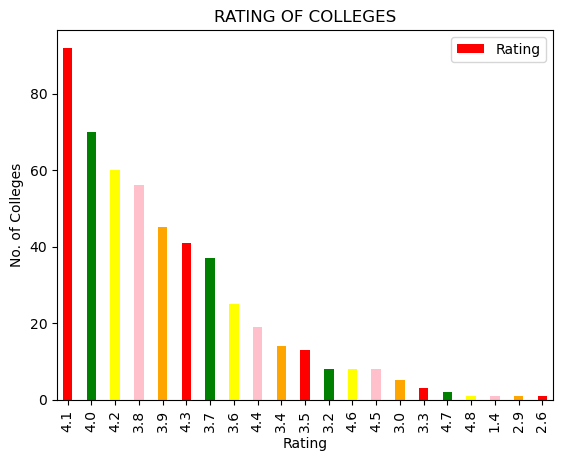

In [43]:
#BAR CHART FOR RATINGS
Data1 = College_Data["Rating"].value_counts()
Data1.plot.bar(width = 0.4 , color = ["red" ,  "green" , "yellow" , "pink" , "orange"])
plt.legend()
plt.title("RATING OF COLLEGES")
plt.xlabel("Rating")
plt.ylabel("No. of Colleges")
plt.show()

Observation:
       MOstly colleges having a good rating that is above 4.0

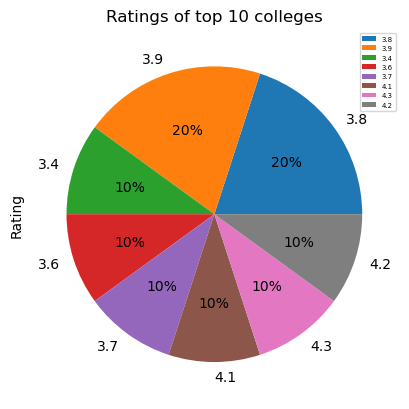

In [44]:
# PIE CHART OF TOP TEN COLLEGES ON FEE
Data6 = Top_10fee["Rating"].value_counts()
Data6.plot.pie(autopct='%.0f%%')
plt.title("Ratings of top 10 colleges")
plt.legend(fontsize=5)
plt.show()

Observation:
            From 10 ten colleges , 10% colleges having  rating of 4.3 which is maximum

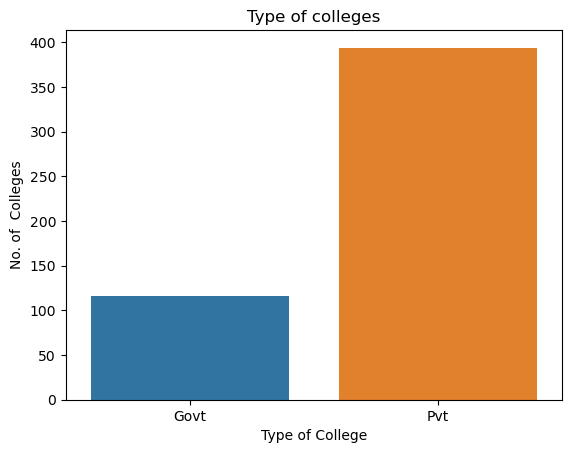

In [45]:
sns.countplot(x = "College Type", data=College_Data)
plt.title("Type of colleges")
plt.xlabel("Type of College")
plt.ylabel("No. of  Colleges")
plt.show()

Observation:
           there are 110 govt and 390 are private colleges in the count of 500

<Axes: >

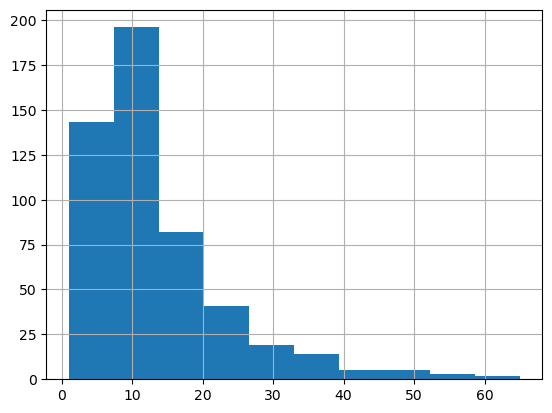

In [46]:
#plotting histogram for  analysing the columns of data frame

College_Data['Courses Offered'].hist()

Observation:
    More than 200 colleges are offerering 10 courses

<Axes: >

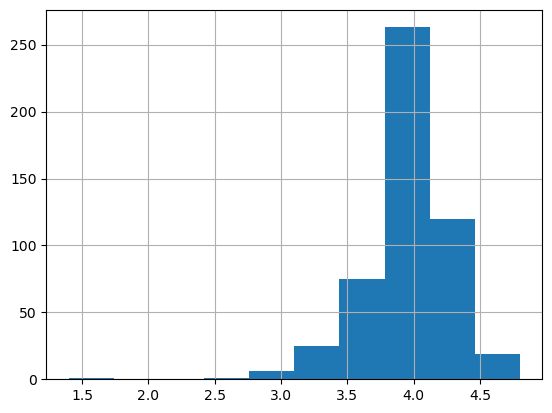

In [47]:
College_Data['Rating'].hist()

Observation:
    there are more than 250 colleges which are having a good rating of 4.0

<Axes: >

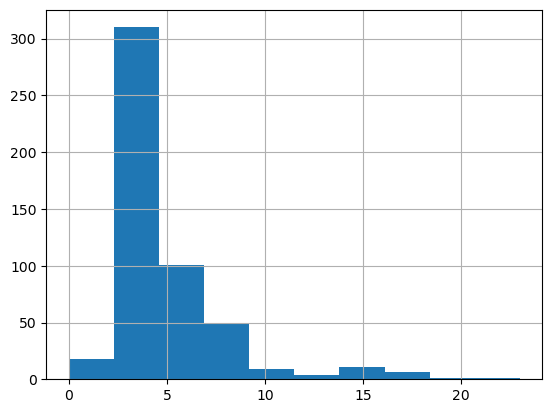

In [48]:
College_Data['Average Package'].hist()

Observation:
        There are more than 300 colleges who is giving placement of minimum 4 lpa

<Axes: >

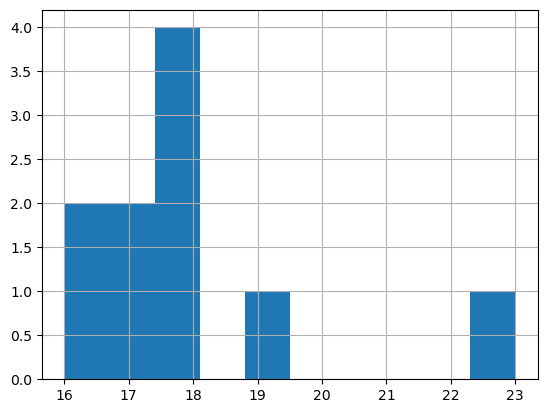

In [49]:
Top_10Package['Average Package'].hist()

Observation : 
       Top 10 colleges giving placement in between 16 to 23 lpa

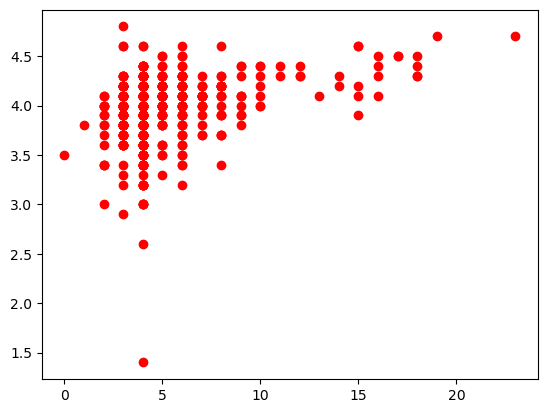

In [50]:
plt.scatter(College_Data["Average Package"] , College_Data["Rating"] , color = "red")

Obbservation:
         We are having a good correlation between Rating and package

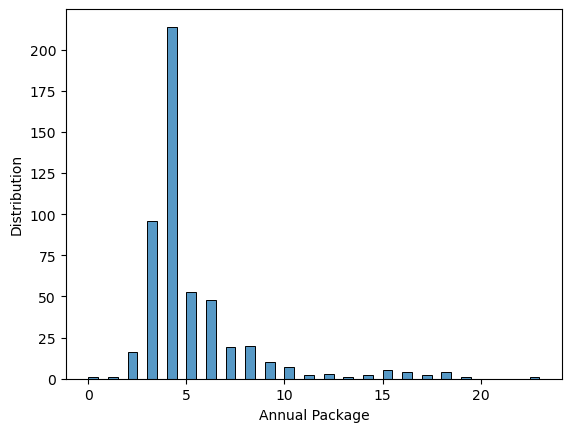

In [51]:
## Hist plot of packages and fee
sns.histplot(College_Data["Average Package"])
plt.xlabel("Annual Package")
plt.ylabel("Distribution")
plt.show()

Observation:
         Maximum colleges are giving placement of 4 lpa

BIVARIATE ANALYSIS

i) Numerical & Numerical a. Scatterplot b. Line plot c. Heatmap for correlation d. Joint plot ii) Numerical & Categorical a. Bar chart b. Violin plot iii) Categorical & Categorical a. Bar chart b. Grouped bar chart

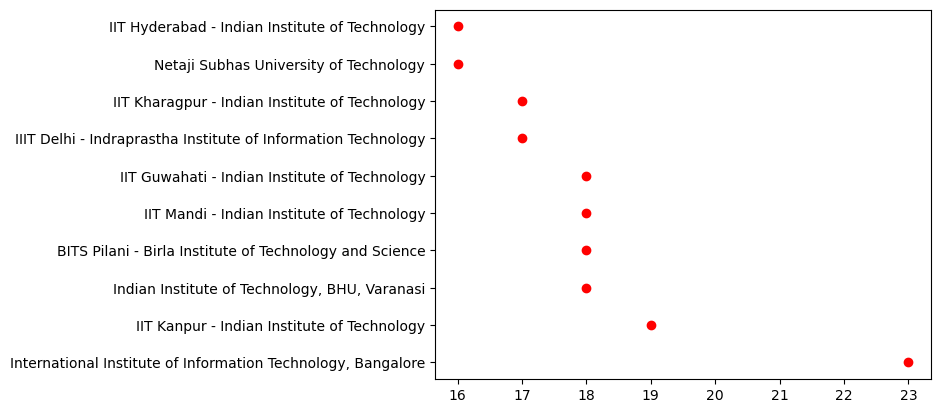

In [52]:
#Visualizing the data using scatter plot between Fee and package
plt.scatter(Top_10Package["Average Package"] , Top_10Package["College Name"] , color = "red")

Observation: All IIT's are having a good package 

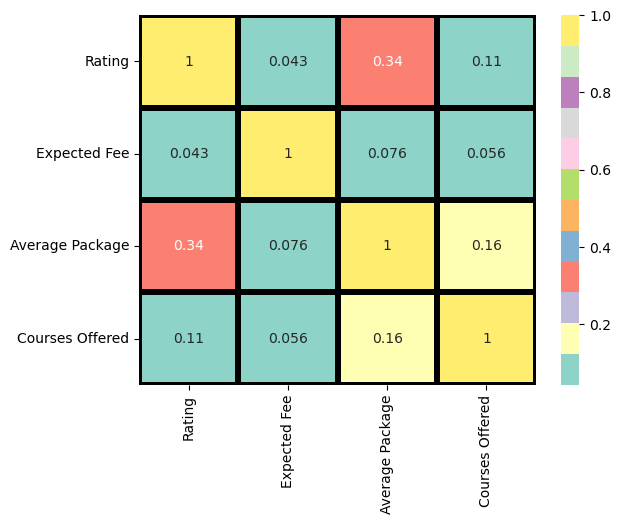

In [53]:
sns.heatmap(College_Data.corr() , annot = True , cmap = "Set3" , linecolor = "black" , linewidth = 4)
plt.show()

Observation:
    There is a good correlation between Rating , fees ,  package.

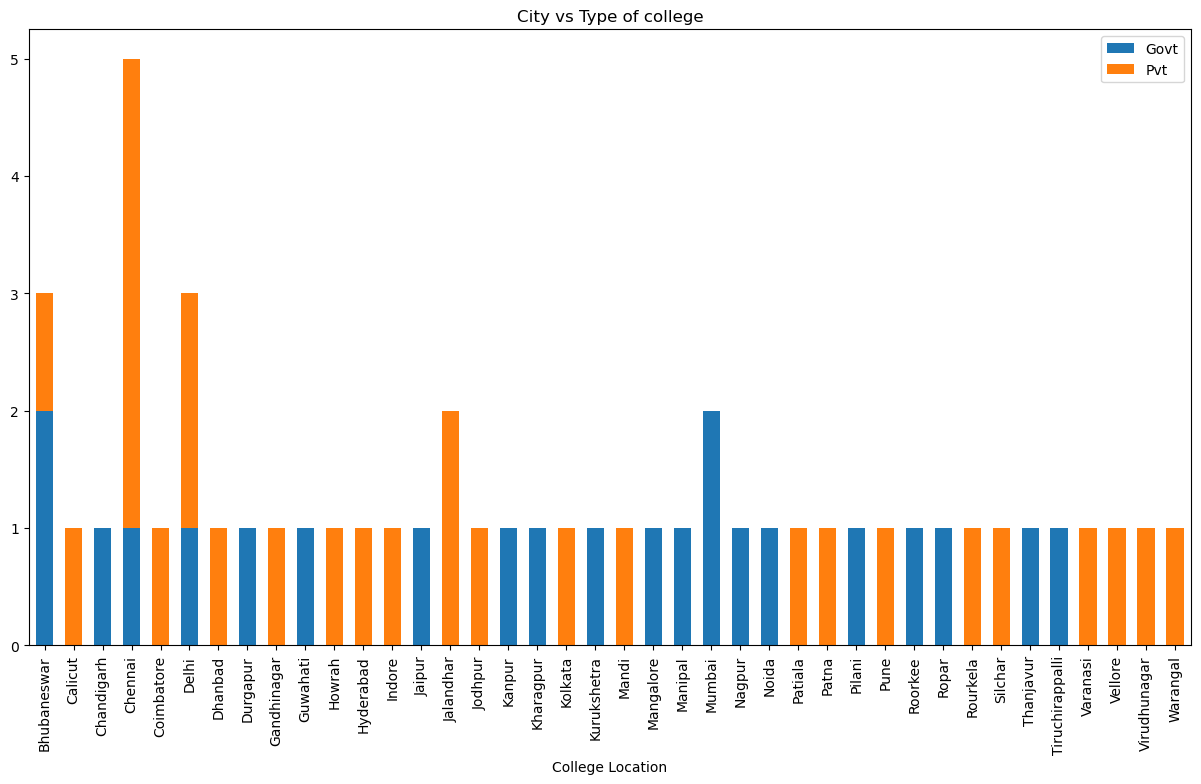

In [54]:
fig , ax = plt.subplots(figsize = (15,8))
pd.crosstab(College_Data["College Location"][0:50] , College_Data["College Type"][0:50]).plot(kind = "bar" , ax = ax , width = 0.6 , stacked = True)
plt.title('City vs Type of college')
plt.legend(bbox_to_anchor = (1,1))

Multivariate Analysis

In [55]:
# Now plotting the Profile Report  of our whole data

Profile = ProfileReport(College_Data , title = 'College Data')
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
# saving this file in HTML
Profile.to_file("DATAPROJECT.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
## Publishing the data  in tableau form

pg.walk(College_Data)


  File "C:\Users\DELL\anaconda3\lib\site-packages\aiohttp\connector.py", line 980, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore[return-value]  # noqa
  File "C:\Users\DELL\anaconda3\lib\asyncio\base_events.py", line 1097, in create_connection
    transport, protocol = await self._create_connection_transport(
  File "C:\Users\DELL\anaconda3\lib\asyncio\base_events.py", line 1127, in _create_connection_transport
    await waiter
  File "C:\Users\DELL\anaconda3\lib\asyncio\sslproto.py", line 534, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "C:\Users\DELL\anaconda3\lib\asyncio\sslproto.py", line 188, in feed_ssldata
    self._sslobj.do_handshake()
  File "C:\Users\DELL\anaconda3\lib\ssl.py", line 975, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)

The a